In [ ]:
#install dependecies
!pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.5 MB/s eta 0:00:00


In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.5 MB/s eta 0:00:00


In [ ]:
import PyPDF2

def extract_data_from_pdf(pdf_path):
  with open(pdf_path , 'rb') as file:
    pdfreader = PyPDF2.PdfReader(file)
    full_text = ''
    for page in pdfreader.pages:
      full_text += page.extract_text()
  return full_text

In [ ]:
extracted_text = extract_data_from_pdf('/content/company_manual.pdf')
print(extracted_text)

Company Manual - TechNova Solutions Pvt. Ltd.
About the Company
TechNova Solutions Pvt. Ltd. is a global leader in consumer electronics, committed to delivering
innovative technology and excellent customer service. 
Founded in 2005, TechNova has grown to serve over 20 million customers across 35 countries. We
specialize in smart devices, home automation, and sustainable technology solutions.
Our mission is to make everyday life smarter, simpler, and more connected. We believe in constant
innovation, environmental responsibility, and customer satisfaction above all else.
Our headquarters are located in Bengaluru, India, with major regional offices in Singapore,
Germany, and the United States.
Return Policy
We offer a 30-day return policy on all our products purchased directly through our website or
authorized outlets.
To be eligible for a return, the product must be unused, in its original packaging, and accompanied
by the original invoice. Refunds are initiated after we receive and ins

In [ ]:
import re

def clean_text(text):
  #remove extra spaces
  text = re.sub(r'\s+' , ' ' , text)
  #remove non-ascii characters (if any)
  text = re.sub(r'[^\x00-\x7F]+' , '', text)
  return text

cleaned_text = clean_text(extracted_text)
print(cleaned_text)

Company Manual - TechNova Solutions Pvt. Ltd. About the Company TechNova Solutions Pvt. Ltd. is a global leader in consumer electronics, committed to delivering innovative technology and excellent customer service. Founded in 2005, TechNova has grown to serve over 20 million customers across 35 countries. We specialize in smart devices, home automation, and sustainable technology solutions. Our mission is to make everyday life smarter, simpler, and more connected. We believe in constant innovation, environmental responsibility, and customer satisfaction above all else. Our headquarters are located in Bengaluru, India, with major regional offices in Singapore, Germany, and the United States. Return Policy We offer a 30-day return policy on all our products purchased directly through our website or authorized outlets. To be eligible for a return, the product must be unused, in its original packaging, and accompanied by the original invoice. Refunds are initiated after we receive and insp

In [ ]:
#Step 2 - Import reuired libraries
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Step 3- Load pre-trained model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [ ]:
#Step 4 - Define the document sections
sections = {
    "About the Company" : cleaned_text.split('About the Company')[1].split('Return Policy')[0],
    "Return Policy" : cleaned_text.split('Return Policy')[1].split('Warranty')[0],
    "Warranty" : cleaned_text.split('Warranty')[1].split('Customer Service')[0],
    "Customer Service" : cleaned_text.split('Customer Service')[1].split('Environmental Commitment')[0],
    "Environmental Commitment" : cleaned_text.split('Environmental Commitment')[1]
}

In [ ]:
#Step 5 -Define our query
query = "How do I send the item back?"

In [ ]:
#Step 6 - Create embeddings
query_embedding = model.encode([query])[0]

In [ ]:
print(query_embedding.shape)

(384,)


In [ ]:
section_embeddings = {}

for title,content in sections.items():
  #print(model.encode([content])[0])
  section_embeddings[title] = model.encode([content])[0]

In [ ]:
print(section_embeddings)

{'About the Company': array([ 2.43429970e-02, -1.14101455e-01,  1.92481831e-01, -4.44419622e-01,
       -8.84334184e-03, -2.95841604e-01, -8.91093984e-02,  2.78108418e-01,
       -4.83649559e-02,  4.44731086e-01,  2.68115848e-01,  1.66008949e-01,
        3.54811668e-01,  1.38919458e-01, -4.83584106e-02, -8.30479339e-02,
       -4.64033723e-01, -3.91671926e-01,  1.16601661e-01,  3.37116033e-01,
        1.00764837e-02, -3.59553546e-01,  8.83449838e-02, -3.03395361e-01,
        9.98509526e-02, -5.35025671e-02,  7.91149363e-02, -1.49658909e-02,
        2.55604740e-02, -3.76652330e-01,  8.70147794e-02,  3.16346824e-01,
        3.29329371e-01,  9.08905547e-03, -1.91859111e-01,  4.19813275e-01,
       -1.04815429e-02, -2.84812868e-01, -4.11184281e-01, -1.62651852e-01,
       -2.48285323e-01, -2.86794066e-01,  1.52240535e-02,  5.36542498e-02,
        6.44927397e-02, -7.02637136e-02,  1.17790505e-01,  9.96466912e-03,
        3.46788168e-02, -1.96640819e-01,  3.81927669e-01, -1.30843055e-02,
   

In [ ]:
section_embeddings['About the Company'].shape

(384,)

In [ ]:
#Step 7 -Define the cosine similarity function
def cosine_similarity(a,b):
  return np.dot(a,b)/(np.linalg.norm(a) * np.linalg.norm(b))

In [ ]:
#Step 8 - Calculated similarity of each section

similarities = {}
for title,emb in section_embeddings.items():
  #print(query_embedding.shape , emb.shape)
  sim = cosine_similarity(query_embedding , emb)
  similarities[title] = sim
  print(f"Similarity with {title} : {sim:.3f}")


Similarity with About the Company : -0.020
Similarity with Return Policy : 0.471
Similarity with Warranty : 0.125
Similarity with Customer Service : 0.054
Similarity with Environmental Commitment : 0.077


In [ ]:
print(similarities)

{'About the Company': np.float32(-0.019757478), 'Return Policy': np.float32(0.4709469), 'Warranty': np.float32(0.124684885), 'Customer Service': np.float32(0.053664498), 'Environmental Commitment': np.float32(0.076738365)}


In [ ]:
#Step 9 -Find the best match
best_match = max(similarities , key = similarities.get)
print(f"Best Match: {best_match}\n Content: {sections[best_match]}")

Best Match: Return Policy
 Content:  We offer a 30-day return policy on all our products purchased directly through our website or authorized outlets. To be eligible for a return, the product must be unused, in its original packaging, and accompanied by the original invoice. Refunds are initiated after we receive and inspect the returned item. Returns are not accepted for customized products, opened software, or items marked 'final sale.' For international orders, return shipping costs are borne by the customer unless the product is found defective upon arrival. Please initiate your return through our online portal or by contacting our support team within 30 days of delivery. 


In [ ]:
#Dtep 10 - Visualize the result
titles = list(similarities.keys())
scores = list(similarities.values())

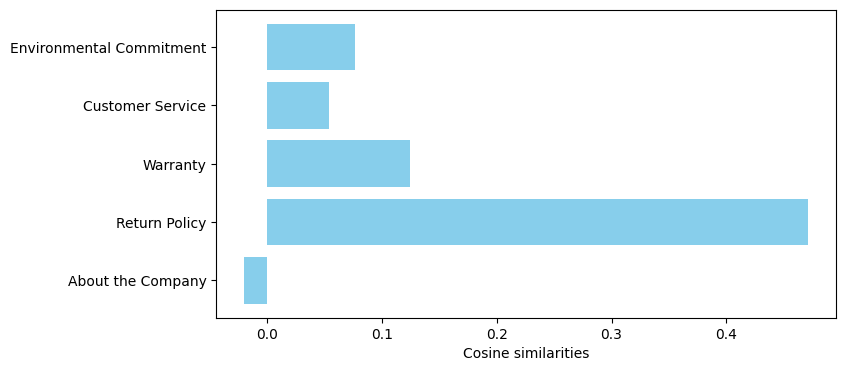

In [ ]:
plt.figure(figsize = (8,4))
plt.barh(titles,scores,color='skyblue')
plt.xlabel("Cosine similarities")
plt.show()

**Create a chatbot which can use semantic search to repond to a query given**

In [ ]:
def cosine_similarity(querry_embedding, section_embedding):
  return np.dot(querry_embedding, section_embedding)/(np.linalg.norm(querry_embedding) * np.linalg.norm(section_embedding))

In [ ]:
def semantic_search(query , sections):
  query_embedding = model.encode([query])[0]
  best_match = None
  max_similarity = 0.3

  for section_title,content in sections.items():
    section_embedding = model.encode([content])[0]
    similarity = cosine_similarity(query_embedding, section_embedding)

    if similarity > max_similarity:
      max_similarity = similarity
      best_match = section_title

  if best_match is not None:
    return f"Bot: The most relevant section is: {best_match}, Here is a brief answer: {sections[best_match][:500]}"
  else:
    return f"Bot: I couldn't find the most relevant section."

In [ ]:
user_query = "policy for returning the things"
semantic_search(user_query , sections)

"Bot: The most relevant section is: Return Policy, Here is a brief answer:  We offer a 30-day return policy on all our products purchased directly through our website or authorized outlets. To be eligible for a return, the product must be unused, in its original packaging, and accompanied by the original invoice. Refunds are initiated after we receive and inspect the returned item. Returns are not accepted for customized products, opened software, or items marked 'final sale.' For international orders, return shipping costs are borne by the customer unless the product "